In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [453]:
def random_split_data(X, y, train_percentage=0.7, val_percentage=0.15, test_percentage=0.15):
    """
    Randomly splits the data into training, validation, and test sets.

    Parameters:
    - X: Feature matrix
    - y: Labels
    - train_percentage: Percentage of data for training (default is 0.7)
    - val_percentage: Percentage of data for validation (default is 0.15)
    - test_percentage: Percentage of data for testing (default is 0.15)

    Returns:
    - X_train, y_train: Training set
    - X_val, y_val: Validation set
    - X_test, y_test: Test set
    """

    # Check if percentages sum up to 1
    total_percentage = train_percentage + val_percentage + test_percentage
    if total_percentage != 1.0:
        raise ValueError("Percentages should sum up to 1.0")

    # Get the total number of examples
    total_examples = len(X)

    # Shuffle the data
    indices = np.arange(total_examples)
    np.random.shuffle(indices)

    # Split data into training, validation, and test sets
    train_size = int(train_percentage * total_examples)
    val_size = int(val_percentage * total_examples)

    train_indices = indices[:train_size]
    remaining_indices = indices[train_size:]

    val_indices = remaining_indices[:val_size]
    test_indices = remaining_indices[val_size:]

    # Create sets
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    return X_train, y_train, X_val, y_val, X_test, y_test

In [454]:
N=100
D=2
K=3

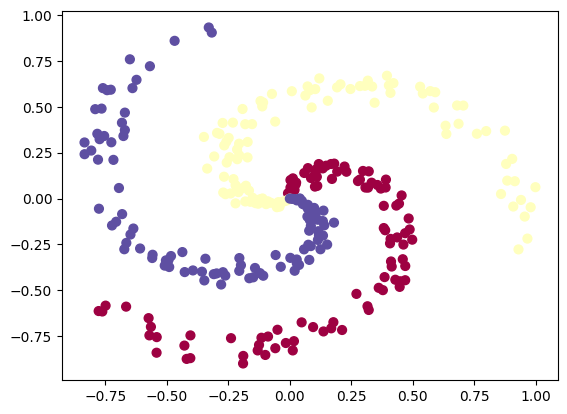

In [455]:
X = np.zeros((N * K, D))
y = np.zeros((N * K), dtype="uint8")

for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

--------------------------------------

Display the first 10 samples of X, which represent our features, the labels y, which correspond to our outputs, and their respective shapes.


In [456]:

X[:10],y,X.shape,y.shape

(array([[ 0.        ,  0.        ],
        [-0.00039054,  0.01009346],
        [ 0.00042263,  0.0201976 ],
        [-0.00748375,  0.02936438],
        [ 0.00565072,  0.04000695],
        [ 0.01907986,  0.04676237],
        [ 0.00255655,  0.06055211],
        [ 0.01736977,  0.06854036],
        [ 0.02356582,  0.07729553],
        [ 0.02553081,  0.08725045]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Separating data into train ,validate and test sets

In [457]:
X_train, y_train, X_val, y_val, X_test, y_test = random_split_data(X, y)

--------------------------------------

Initialize the weight matrix W_exp with random values from a standard normal distribution


In [458]:
W_exp=np.random.randn(D, K)
W_exp   #W_exp matrix has dimensions D (number of features) by K (number of classes)

array([[ 0.79214967,  0.93185203, -0.30480443],
       [-0.64429799, -1.3586719 ,  0.63687724]])


We use a small scaling factor (0.01) to initialize the weights (W) in order to prevent issues like the gradients becoming too high during training

In [459]:
W = 0.01 * W_exp
W

array([[ 0.0079215 ,  0.00931852, -0.00304804],
       [-0.00644298, -0.01358672,  0.00636877]])

--------------------------------------

 Initialize the bias vector b with zeros. 

In [460]:
b = np.zeros((1, K))
b   # The vector has dimensions 1 by K, where K is the number of classes.

array([[0., 0., 0.]])

--------------------------------------

Calculate the scores for each class by performing a dot product between the input features (X) and the weight matrix (W),and then adding the bias vector (b).

In [461]:
scores = np.dot(X_train, W) + b
scores[:10],scores.shape

(array([[ 8.81164217e-05,  1.11902201e-04, -3.92443712e-05],
        [-7.71975677e-03, -1.13262725e-02,  4.42402728e-03],
        [-1.26784857e-04, -2.70480808e-04,  1.27345714e-04],
        [-2.20364182e-03,  1.09213136e-03, -1.53760913e-03],
        [ 1.50437611e-03,  2.16335779e-03, -8.33745507e-04],
        [ 4.34077430e-04,  9.27456219e-05,  1.03541806e-04],
        [-1.80763709e-03, -2.44146718e-04, -5.23170444e-04],
        [ 2.90020140e-04,  3.99612797e-04, -1.49435625e-04],
        [ 2.34065663e-03,  2.30679729e-03, -6.11447324e-04],
        [ 1.75088787e-03,  3.11139438e-03, -1.35466441e-03]]),
 (210, 3))

In [462]:
num_examples = X_train.shape[0]   # This variable is created to be used in loops later in the code.
num_examples   

210


Calculate the scores corresponding to the correct classes for each example.

In [463]:
correct_class_scores = scores[range(num_examples), y_train]
correct_class_scores[:10],correct_class_scores[-10:]

(array([-3.92443712e-05,  4.42402728e-03, -1.26784857e-04, -2.20364182e-03,
        -8.33745507e-04,  4.34077430e-04, -5.23170444e-04, -1.49435625e-04,
         2.34065663e-03, -1.35466441e-03]),
 array([-0.00225625, -0.00519165,  0.00177114,  0.00397598, -0.0012498 ,
        -0.0068168 ,  0.00353119,  0.00492696, -0.00226457,  0.00472872]))

--------------------------------------

Calculate the exponential of the scores to obtain unnormalized probabilities.

In [464]:
exp_scores = np.exp(scores)
exp_scores[:10],exp_scores[-10:]

(array([[1.00008812, 1.00011191, 0.99996076],
        [0.99230996, 0.98873763, 1.00443383],
        [0.99987322, 0.99972956, 1.00012735],
        [0.99779878, 1.00109273, 0.99846357],
        [1.00150551, 1.0021657 , 0.9991666 ],
        [1.00043417, 1.00009275, 1.00010355],
        [0.998194  , 0.99975588, 0.99947697],
        [1.00029006, 1.00039969, 0.99985058],
        [1.0023434 , 1.00230946, 0.99938874],
        [1.00175242, 1.00311624, 0.99864625]]),
 array([[1.00210637, 1.0047206 , 0.9977463 ],
        [0.99871028, 0.9948218 , 1.00287918],
        [1.00177271, 1.00692387, 0.99620717],
        [1.00398389, 1.00927937, 0.99552808],
        [0.99919724, 1.00146392, 0.99875098],
        [0.99590481, 0.99320638, 1.00287124],
        [0.99298367, 0.99049323, 1.00353743],
        [1.00493912, 1.00695383, 0.9973735 ],
        [1.00149483, 1.00437658, 0.99773799],
        [1.00473991, 1.00966454, 0.99556456]]))

Calculate the normalized probabilities by dividing the exponential scores by the sum of exponential scores for each example.

In [465]:
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)   
probs[:10]


array([[0.33334484, 0.33335277, 0.33330239],
       [0.33237854, 0.33118197, 0.33643948],
       [0.33332106, 0.33327317, 0.33340578],
       [0.33289309, 0.33399204, 0.33311488],
       [0.33351968, 0.33373954, 0.33274078],
       [0.33340799, 0.33329421, 0.3332978 ],
       [0.33301697, 0.33353804, 0.33344499],
       [0.33336998, 0.33340651, 0.33322351],
       [0.33366495, 0.33365366, 0.33268139],
       [0.3335267 , 0.33398078, 0.33249252]])

Calculate the sum of probabilities for each example, ensuring that the total probability for each example sums to 1

In [466]:
probs_val = np.sum(probs,axis=1,keepdims=True) 
probs_val[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

--------------------------------------

Calculate the cross-entropy loss by summing the negative logarithm of the predicted probabilities for the correct classes.

In [467]:
loss = -np.sum(np.log(probs[range(num_examples), y_train])) / num_examples
loss

1.0984999702127143

This demonstrates that even if all values are randomly assigned, the worst-case loss can be determined by log2 of the number of classes. 

In [468]:
import math
result = math.log2(3)  
result

1.584962500721156

---------


Create a copy of the probabilities array to represent the gradient of the scores with respect to the loss.

In [469]:
dscores = probs.copy()
dscores[range(num_examples), y_train] -= 1    #Subtracting 1 from the probabilities of correct classes increases the gradient and can decrease the learning time during backpropagation.
dscores

array([[ 0.33334484,  0.33335277, -0.66669761],
       [ 0.33237854,  0.33118197, -0.66356052],
       [-0.66667894,  0.33327317,  0.33340578],
       [-0.66710691,  0.33399204,  0.33311488],
       [ 0.33351968,  0.33373954, -0.66725922],
       [-0.66659201,  0.33329421,  0.3332978 ],
       [ 0.33301697,  0.33353804, -0.66655501],
       [ 0.33336998,  0.33340651, -0.66677649],
       [-0.66633505,  0.33365366,  0.33268139],
       [ 0.3335267 ,  0.33398078, -0.66750748],
       [-0.66682802,  0.33457709,  0.33225093],
       [-0.66606045,  0.33563459,  0.33042586],
       [ 0.33312904, -0.66705177,  0.33392273],
       [ 0.33354643, -0.66756604,  0.33401961],
       [-0.66614   ,  0.33584667,  0.33029333],
       [ 0.33332905, -0.66808006,  0.33475101],
       [ 0.33449133, -0.66453482,  0.3300435 ],
       [ 0.33440013, -0.66502932,  0.33062919],
       [ 0.33311485, -0.66692604,  0.33381119],
       [-0.66667344,  0.33330234,  0.3333711 ],
       [ 0.33347074,  0.33373748, -0.667

-----


Calculate the gradient of the weights dW :
Multiply these probabilities (dscores) with the transpose of our input data x, we would essentially be applying a weighted sum to each row of x based on the calculated probabilities for each class.
Each row corresponds to a class, and the columns represent the weighted sum of the input features based on the calculated probabilities for that class.


Calculate the gradient of the bias terms db:
Summing the probabilities (dscores) along the rows (axis=0) provides the contribution of each class to the gradient of the bias terms. Each element in the resulting array corresponds to the sum of probabilities for the respective class across all input samples.

In [470]:
dW = np.dot(X_train.T, dscores)        
db = np.sum(dscores, axis=0, keepdims=True)

In [471]:
dW

array([[ -5.46311654, -12.49059006,  17.9537066 ],
       [ 18.31260526, -21.39552885,   3.08292359]])

In [472]:
db

array([[ 1.00187837, -4.98659789,  3.98471953]])

-----


Update the weights (W) and biases (b) using the learning rate (alpha) 

In [473]:
alpha = 0.01  
W -= alpha * dW
b -= alpha * db


New weights and biases

In [474]:
W,b

(array([[ 0.06255266,  0.13422442, -0.18258511],
        [-0.18956903,  0.20036857, -0.02446046]]),
 array([[-0.01001878,  0.04986598, -0.0398472 ]]))

------


Training the model using the training and validation sets

In [475]:
def trainModel(X_train, y_train, X_val, y_val, W, b, epochs=400, alpha=0.01):
    """
    Train a model using gradient descent.

    Parameters:
    - X_train: Training feature matrix
    - y_train: Training true labels
    - X_val: Validation feature matrix
    - y_val: Validation true labels
    - W: Model weights
    - b: Model bias
    - epochs: Number of training epochs (default is 1000)
    - alpha: Learning rate (default is 0.01)

    Returns:
    - W: Updated weights after training
    - b: Updated bias after training
    - train_losses: List of training losses for each epoch
    - val_losses: List of validation losses for each epoch
    """
    # Lists to store losses for plotting.We can use these to make sure we don't overfit the training data.
    train_losses = []
    val_losses = []

    # Training loop
    for epoch in range(epochs):
        # Forward pass on the training set
        scores_train = np.dot(X_train, W) + b
        exp_scores_train = np.exp(scores_train)
        probs_train = exp_scores_train / np.sum(exp_scores_train, axis=1, keepdims=True)
        loss_train = -np.sum(np.log(probs_train[range(len(y_train)), y_train])) / len(y_train)

        # Backward pass on the training set
        dscores_train = probs_train.copy()
        dscores_train[range(len(y_train)), y_train] -= 1
        dW_train = np.dot(X_train.T, dscores_train)
        db_train = np.sum(dscores_train, axis=0, keepdims=True)

        # Update parameters for the training set
        W -= alpha * dW_train
        b -= alpha * db_train

        # Store the training loss for plotting
        train_losses.append(loss_train)

        # Forward pass on the validation set
        scores_val = np.dot(X_val, W) + b
        exp_scores_val = np.exp(scores_val)
        probs_val = exp_scores_val / np.sum(exp_scores_val, axis=1, keepdims=True)
        loss_val = -np.sum(np.log(probs_val[range(len(y_val)), y_val])) / len(y_val)

        # Store the validation loss for plotting
        val_losses.append(loss_val)

    return W, b, train_losses, val_losses


In [476]:
WTrained, bTrained, train_losses, val_losses = trainModel(X_train, y_train, X_val, y_val, W, b, epochs=400, alpha=0.01)
train_losses[:10], val_losses[:10]

([1.0384008097796606,
  0.9923892553158165,
  0.9563354078552037,
  0.9276799331206116,
  0.9046044555164153,
  0.8857913945079469,
  0.8702773142915795,
  0.8573499580457589,
  0.846476144056139,
  0.8372515602321043],
 [0.9799400002943938,
  0.9382122232175794,
  0.9047932803236467,
  0.8777555555333537,
  0.855630666715046,
  0.8373238766077238,
  0.8220192921902266,
  0.8091038417637466,
  0.798111635983956,
  0.7886843427556978])

Checking accuracy using the model with the test set and updated weights and biases.

In [477]:
def AccuracyCheck(X, y, W, b):
    """
    Evaluate the accuracy of the model on a given dataset.

    Parameters:
    - X: Feature matrix
    - y: True labels
    - W: Weights
    - b: Bias

    Returns:
    - accuracy: Accuracy of the model on the given dataset
    """
    scores = np.dot(X, W) + b
    # Determine predicted classes (class with the highest probability)
    predicted_classes = np.argmax(scores, axis=1)
    # Count the number of correct predictions
    correct_prediction_count = np.sum(predicted_classes == y)
    # Calculate the overall accuracy rate
    accuracy = correct_prediction_count / X.shape[0]
    return accuracy


In [478]:
accuaryOnTest = AccuracyCheck(X_test, y_test, WTrained,bTrained)
accuaryOnTest

0.5333333333333333

A function for showing decision boundaries

In [479]:
def plot_decision_boundary(X, y, W, b):
    """
    Plot the decision boundary of a trained model along with the data points.

    Parameters:
    - X: Feature matrix
    - y: True labels
    - W: Model weights
    - b: Model bias
    """
    # Create a meshgrid of points
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class labels for each point in the meshgrid
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')



In [480]:
def plot_data(features,output,type):
    plt.scatter(features[:, 0], features[:, 1], c=output, s=40, cmap=plt.cm.Spectral,edgecolors='k')
    plt.title(f'{type} Data')
    plt.show()

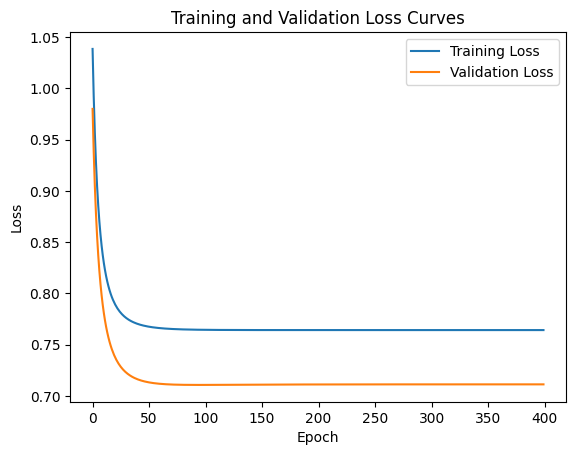

In [481]:
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

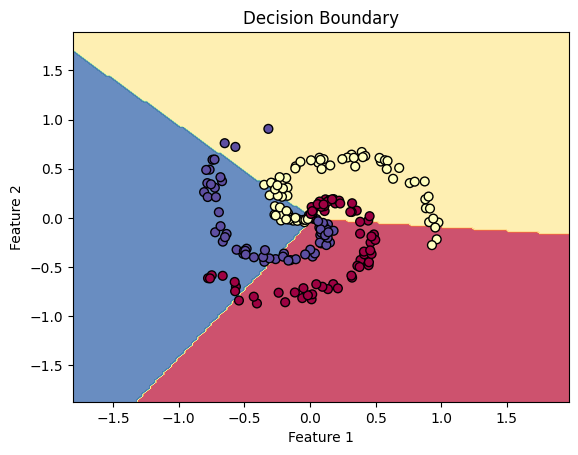

In [482]:

# Plot decision boundary on training set
plot_decision_boundary(X_train, y_train, WTrained, bTrained)
plt.show()

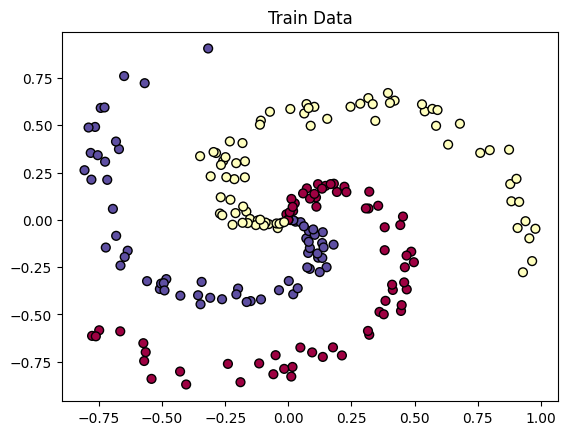

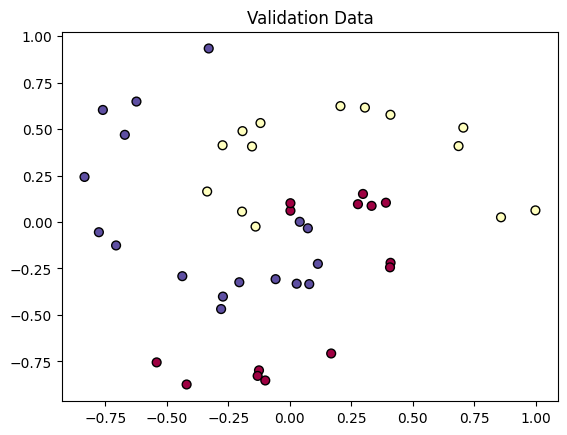

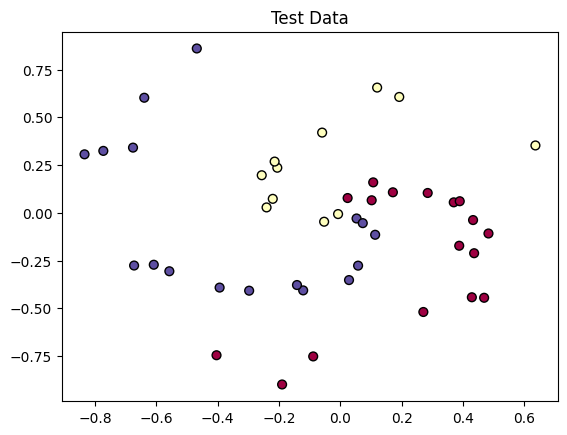

In [483]:
plot_data(X_train, y_train,"Train")
plot_data(X_val, y_val,"Validation")
plot_data(X_test, y_test,"Test")
